# **Project Akhir Internship BCC Kelompok 6**


# Diabetes Health Indicators Dataset

https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset

terdiri dari 22 kolom
Diabetes Health Indicators Dataset Notebook

Important Risk Factors
Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

* Diabetes_binary, 0 = no diabetes 1 = diabetes
*   blood pressure (high), 0 = no high BP 1 = high BP
*   cholesterol (high), 0 = no high cholesterol 1 = high cholesterol
* Cholcheck, 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
* BMI, Body Mass Index
* Smoker, Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes
* stroke, you had a stroke. 0 = no 1 = yes
* HeartDiseaseorAttack, coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
* PhysActivity, physical activity in past 30 days - not including job 0 = no 1 = yes
* Fruits, Consume Fruit 1 or more times per day 0 = no 1 = yes
* Veggies, Consume Vegetables 1 or more times per day 0 = no 1 = yes
* HvyAlcoholConsump, (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
* AnyHealthcare, Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
* NoDocbcCost, Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
* GenHlth, Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
* MentHlth, days of poor mental health scale 1-30 days
* PhysHlth, physical illness or injury days in past 30 days scale 1-30
* DiffWalk, Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
* Sex, 0 = female 1 = male
* Age, 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older
* Education, Education level scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
* Income, Income scale scale 1-8 1 = less than 10,000(dollar) 5 = less than 35,000(dollar) 8 = $75,000 or more



To Do :

Data Cleaning :
* Cek Duplikat
* Hapus duplikat
* Cek Kosong
* Hapus kosong (kalau ada)
* Cek Outlier
* Visualisasi Outlier
* Handling Outlier

EDA :
* Heatmap
* Plot korelasi yang relevan
* Save fig buat presentasi

In [ ]:
#@title Import
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import warnings
import sklearn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.stats import mode

In [ ]:
#@title Data Load / Reset
data = pd.read_csv('https://raw.githubusercontent.com/bhazheng/final-project-internshipDS-bcc/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
#@title Data Load Local
data = pd.read_csv('https://raw.githubusercontent.com/bhazheng/final-project-internshipDS-bcc/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
#@title Data Load Original (Imbalanced)
data = pd.read_csv('https://raw.githubusercontent.com/bhazheng/final-project-internshipDS-bcc/main/diabetes_binary_health_indicators_BRFSS2015.csv')

# Data Cleaning

In [ ]:
#@title Overview
display(data.tail())
print(data.info())
display(data.describe())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#@title Cek data kosong
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#@title Penghapusan duplikasi & reset index
print("Jumlah data duplikat : " + str(data.duplicated().sum()))
data_dropped_duplicate = data.drop_duplicates()
print("Jumlah data setelah duplikat dihapus : " + str(data_dropped_duplicate.duplicated().sum()))
data = data_dropped_duplicate

data = data.reset_index()
data = data.drop(['index'],axis=1)

Jumlah data duplikat : 0
Jumlah data setelah duplikat dihapus : 0


In [ ]:
#@title Overview setelah duplikasi dihapus
display(data.tail())
print(data.info())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
69052,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
69053,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
69054,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
69055,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
69056,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69057 entries, 0 to 69056
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

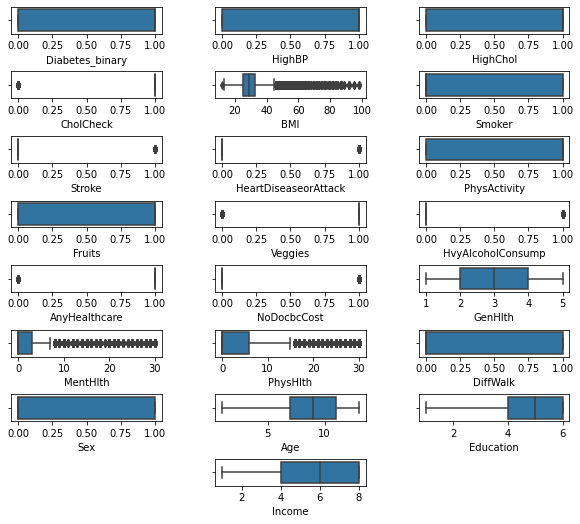

In [ ]:
#@title Visualisasi Outlier
list_columns = data.columns.values.tolist()
gs = GridSpec(nrows=17, ncols=5, width_ratios = [1,0.1,1,0.1,1])

fig = plt.figure(figsize=(10, 10))
column_counter = 0
gs_row = 0
for i in range (7) :
  fig.add_subplot(gs[(gs_row), 0])
  sns.boxplot(data[data.columns[column_counter]],data=data)

  fig.add_subplot(gs[(gs_row), 2])
  sns.boxplot(data[data.columns[(column_counter+1)]],data=data)

  fig.add_subplot(gs[(gs_row), 4])
  sns.boxplot(data[data.columns[(column_counter+2)]],data=data)

  gs_row = gs_row + 2
  column_counter = column_counter+3

fig.add_subplot(gs[14, 2])
sns.boxplot(data[data.columns[(column_counter)]],data=data)
# plt.savefig("boxplot.png")
# files.download("boxplot.png")

In [ ]:
data.loc[data['BMI'] > 95]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
34967,0.0,1.0,0.0,1.0,96.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,4.0,8.0
72307,0.0,0.0,1.0,0.0,98.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,10.0,0.0,0.0,0.0,3.0,4.0,6.0
72331,1.0,1.0,1.0,1.0,98.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,8.0,6.0,5.0
72333,1.0,1.0,1.0,1.0,98.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,4.0,15.0,10.0,1.0,0.0,11.0,5.0,6.0
72469,0.0,1.0,1.0,1.0,98.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,8.0
75166,0.0,1.0,1.0,1.0,98.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,4.0,0.0,1.0,0.0,10.0,4.0,6.0
75195,1.0,0.0,0.0,1.0,98.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,0.0,10.0,6.0,7.0
75242,0.0,0.0,1.0,1.0,98.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,20.0,0.0,0.0,10.0,6.0,7.0


##Outlier Erasure

In [ ]:
#@title Reload data (Outlier BMI)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = py.percentile(data, 25)
    q3 = py.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data.BMI)

data = data[~data.BMI.isin(sample_outliers)]

In [ ]:
#@title Reload data (Outlier MentHlth)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = py.percentile(data, 25)
    q3 = py.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data.MentHlth)

data = data[~data.MentHlth.isin(sample_outliers)]

In [ ]:
#@title Reload data (Outlier PhysHlth)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = py.percentile(data, 25)
    q3 = py.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data.PhysHlth)

data = data[~data.PhysHlth.isin(sample_outliers)]

KeyboardInterrupt: ignored

# Visualisasi Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

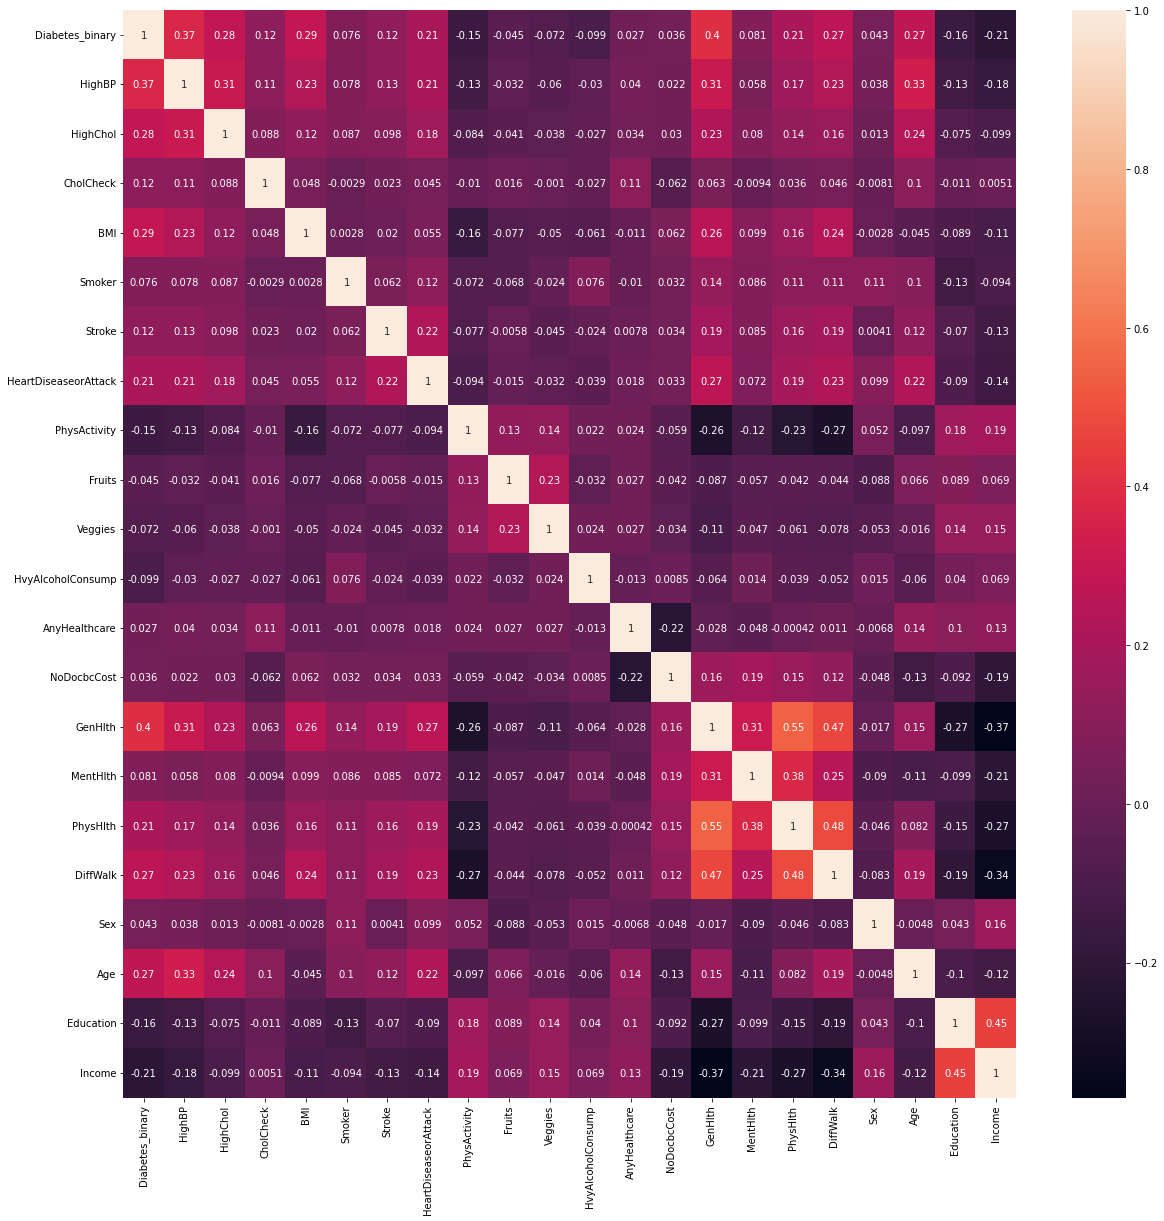

In [ ]:
#@title Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cbar=True,annot=True)
plt.savefig("heatmap.png")
files.download("heatmap.png")

Faktor yang berpengaruh ke pasien diabet atau nggak dari terbesar ke kecil:
* Kesehatan umum (Gen health) -> 0.28
* High Blood Pressure (Hipertensi) -> 0.25
* BMI -> 0.21
* Kendala berjalan (DiffWalk) -> 0.21
* Kategori Kolesterol (HighChol) 0.19
* Umur (Age) 0.18
* HeartDiseasorAttack 0.17
* PhysHlth 0.16
* Stroke 0.099
* CholCheck 0.073
* MentHlth 0.054
* Smoker 0.046
* Sex 0.033
* AnyHealthCare 0.025
* NoDocbcCost 0.02
* Education -0.1
* Income -0.14
* PhysActivity -0.01
* Fruits -0.025
* Veggies -0.042
* HvyAlcoholConsump -0.066

## Feature Importance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x1800 with 0 Axes>

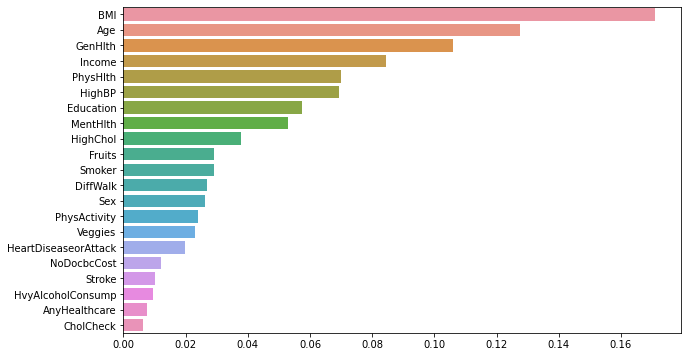

In [ ]:
# random forest feature importance
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(5,6), dpi = 300)
X = data.drop('Diabetes_binary', axis = 1)
y = data['Diabetes_binary']
model = RandomForestClassifier()
model.fit(X,y)
feat = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending = False)
plt.figure(figsize=(10,6))
colors = sns.color_palette('Set2')
bar1 = sns.barplot(x = feat, y = feat.index)
plt.savefig('Feat Bar.png')
files.download('Feat Bar.png')

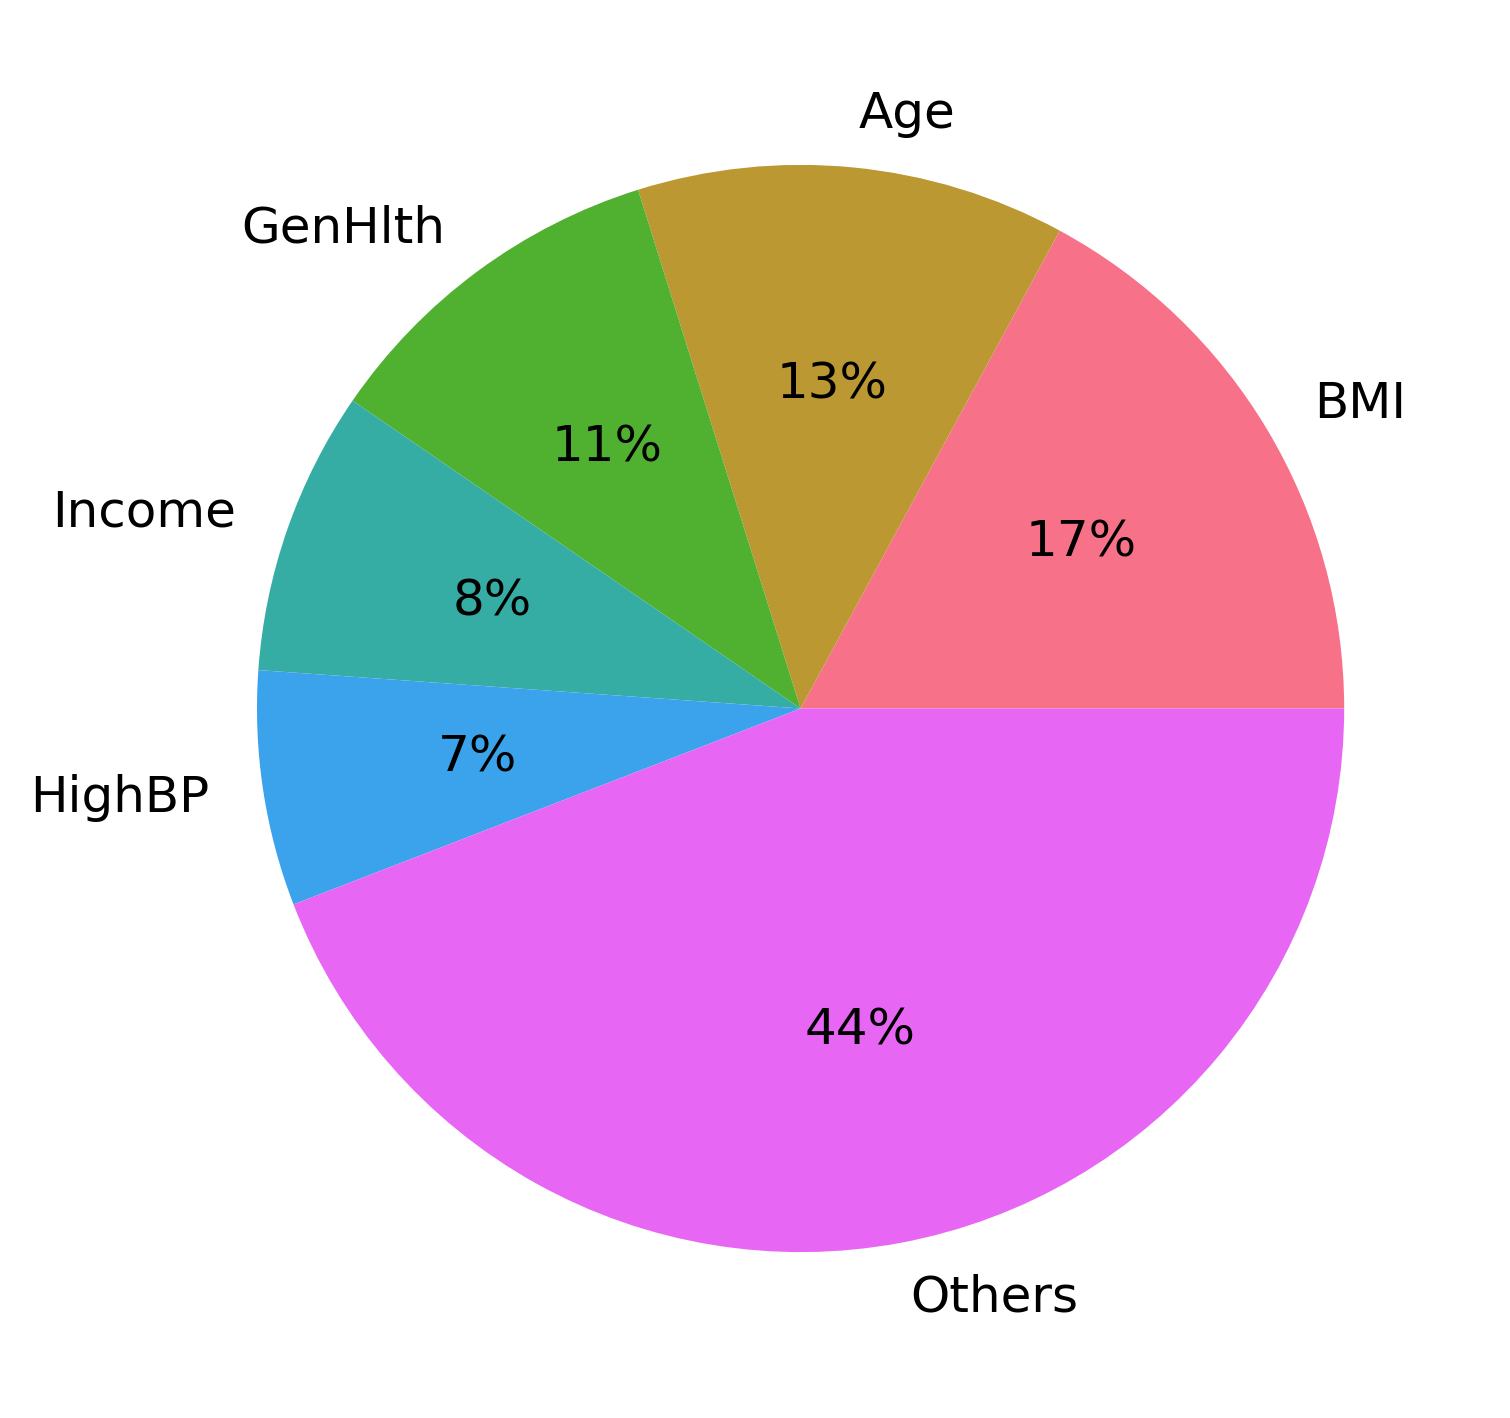

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6), dpi = 300)
pie_data = [(feat[0]),(feat[1]),(feat[2]),(feat[3]),(feat[4]),(feat[5:22].sum())]
labels = ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'Others']
colors = sns.color_palette('husl')
plt.pie(pie_data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 12})
plt.show()
plt.savefig('Pie Feat.png')
files.download('Pie Feat.png')

## Visualisasi Lain

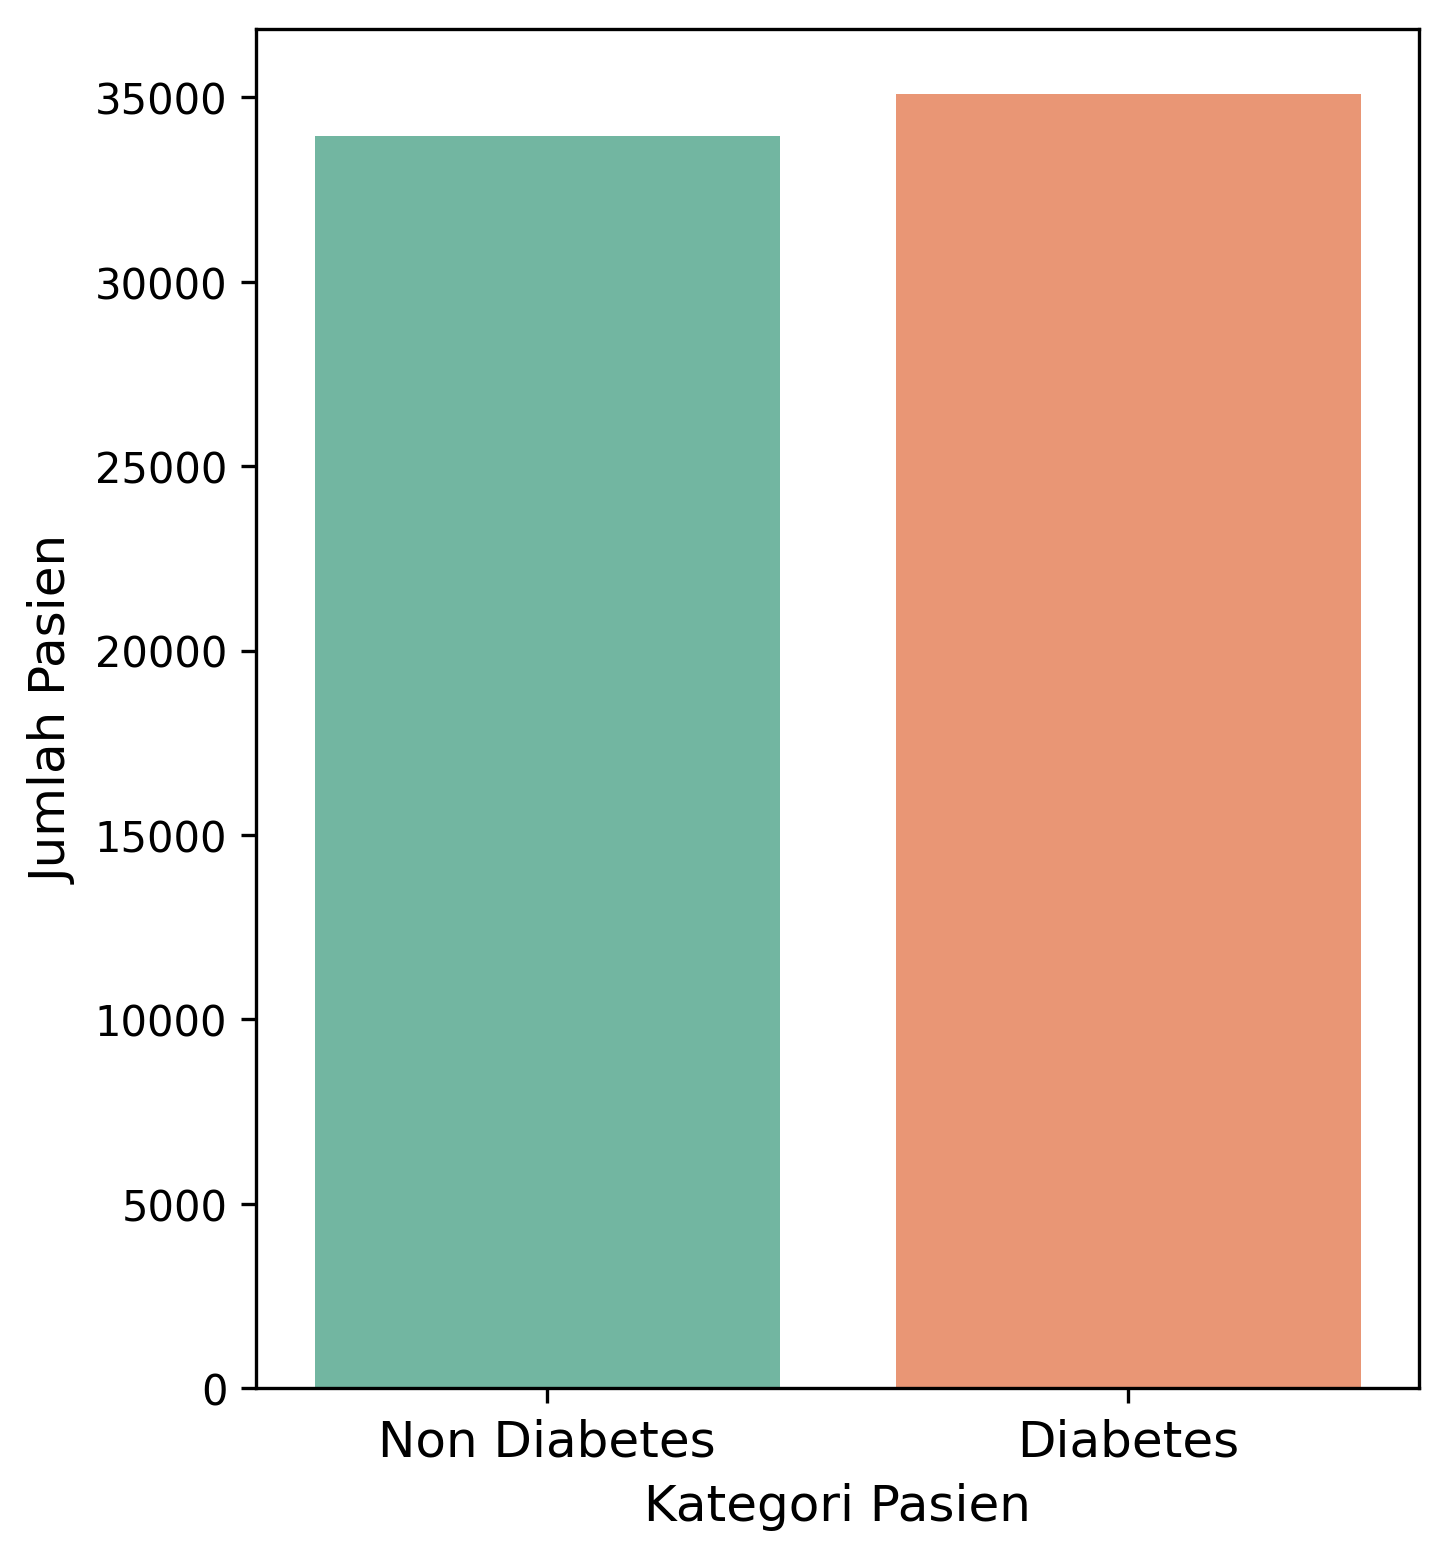

In [ ]:
#@title Persebaran kelas
plt.figure(figsize=(5,6), dpi = 300)
colors = sns.set_palette("Set2")
bar  = sns.countplot(x="Diabetes_binary", data=data)
bar.set_xticklabels(['Non Diabetes','Diabetes'], fontsize = 12)
bar.set_xlabel("Kategori Pasien", fontsize = 12)
bar.set_ylabel("Jumlah Pasien", fontsize = 12)
plt.savefig("Persebaran kelas.png")

<Figure size 3000x3000 with 0 Axes>

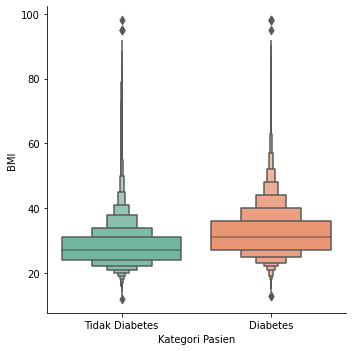

In [ ]:
#@title BMI
fig = plt.figure(figsize=(10,10), dpi = 300)
sns.set_palette("Set2")
box1 = sns.catplot(x="Diabetes_binary",y="BMI",kind='boxen',data = data)
box1.set_xticklabels(['Tidak Diabetes', 'Diabetes'])
box1.set_xlabels("Kategori Pasien")
plt.savefig("BMI.png")

<Figure size 3000x3000 with 0 Axes>

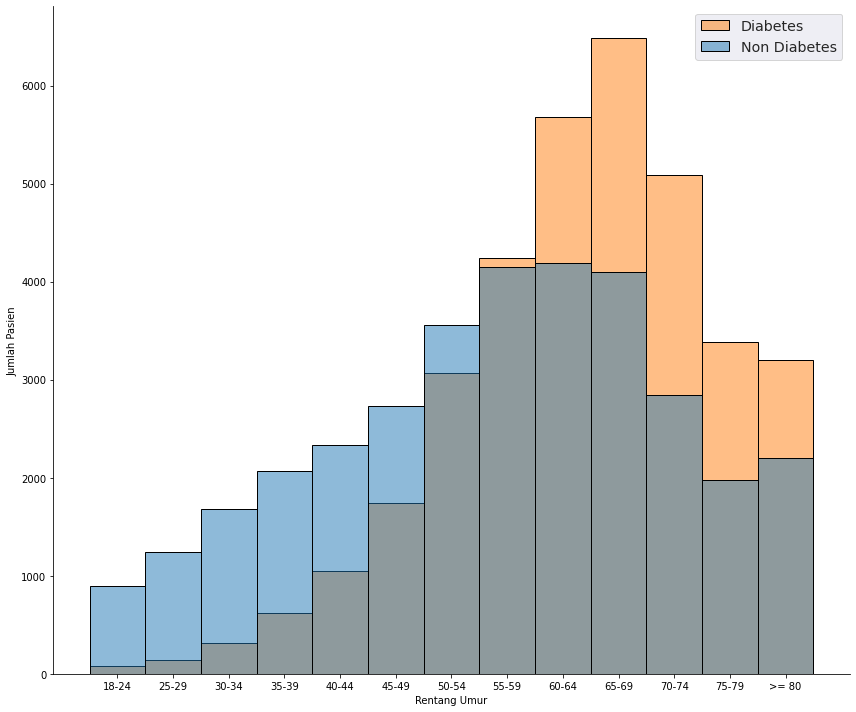

In [ ]:
#@title Age Group
plt.figure(figsize=(10,10), dpi = 300)
data_test = data.copy()
list_Age_Group = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>= 80']
for i in range (1,14,1) :
  data_test = data_test.replace({'Age' : i}, list_Age_Group[i-1])
data_test = data_test.sort_values('Age')
test = sns.displot(data=data_test, x='Age', hue='Diabetes_binary', kind='hist', palette='tab10', aspect = 1.2, height = 10, legend = False)
sns.set(font_scale = 1.3)
plt.legend(labels=['Diabetes','Non Diabetes'])
test.set_ylabels("Jumlah Pasien")
test.set_xlabels("Rentang Umur")
plt.savefig("Age.png")

<Figure size 3000x3000 with 0 Axes>

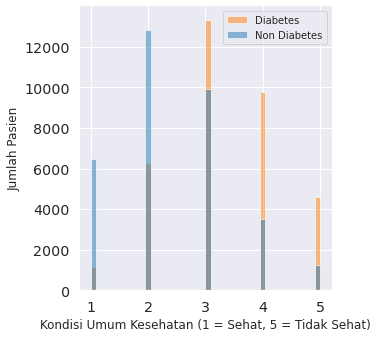

In [ ]:
#@title GenHlth
plt.figure(figsize=(10,10), dpi = 300)
bar = sns.displot(data=data, x='GenHlth', hue='Diabetes_binary', kind='hist', palette='tab10',legend = False)
plt.legend(labels=['Diabetes','Non Diabetes'])
bar.set_xlabels("Kondisi Umum Kesehatan (1 = Sehat, 5 = Tidak Sehat)", fontsize = 12)
bar.set_ylabels("Jumlah Pasien", fontsize = 12)
plt.legend(labels=['Diabetes','Non Diabetes'], fontsize = 10)
plt.savefig("GenHlth.png")

<Figure size 3000x3000 with 0 Axes>

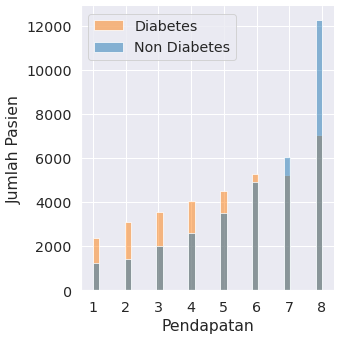

In [ ]:
#@title Income
plt.figure(figsize=(10,10), dpi = 300)
# data_income = data.copy()
test = sns.displot(data=data, x='Income', hue='Diabetes_binary', kind='hist', palette='tab10', legend = False)
# list_income_Group = ['', '10.000-14.999', '15.000-19.999', ]
# for i in range (1,14,1) :
#   data_income = data_income.replace({'Income' : i}, list_Age_Group[i-1])
# data_income = data_income.sort_values('Income')
plt.legend(labels=['Diabetes','Non Diabetes'])
test.set_ylabels("Jumlah Pasien")
test.set_xlabels("Pendapatan")
test.set(xticks=py.arange(1,9,1))
plt.savefig("Pendapatan.png")

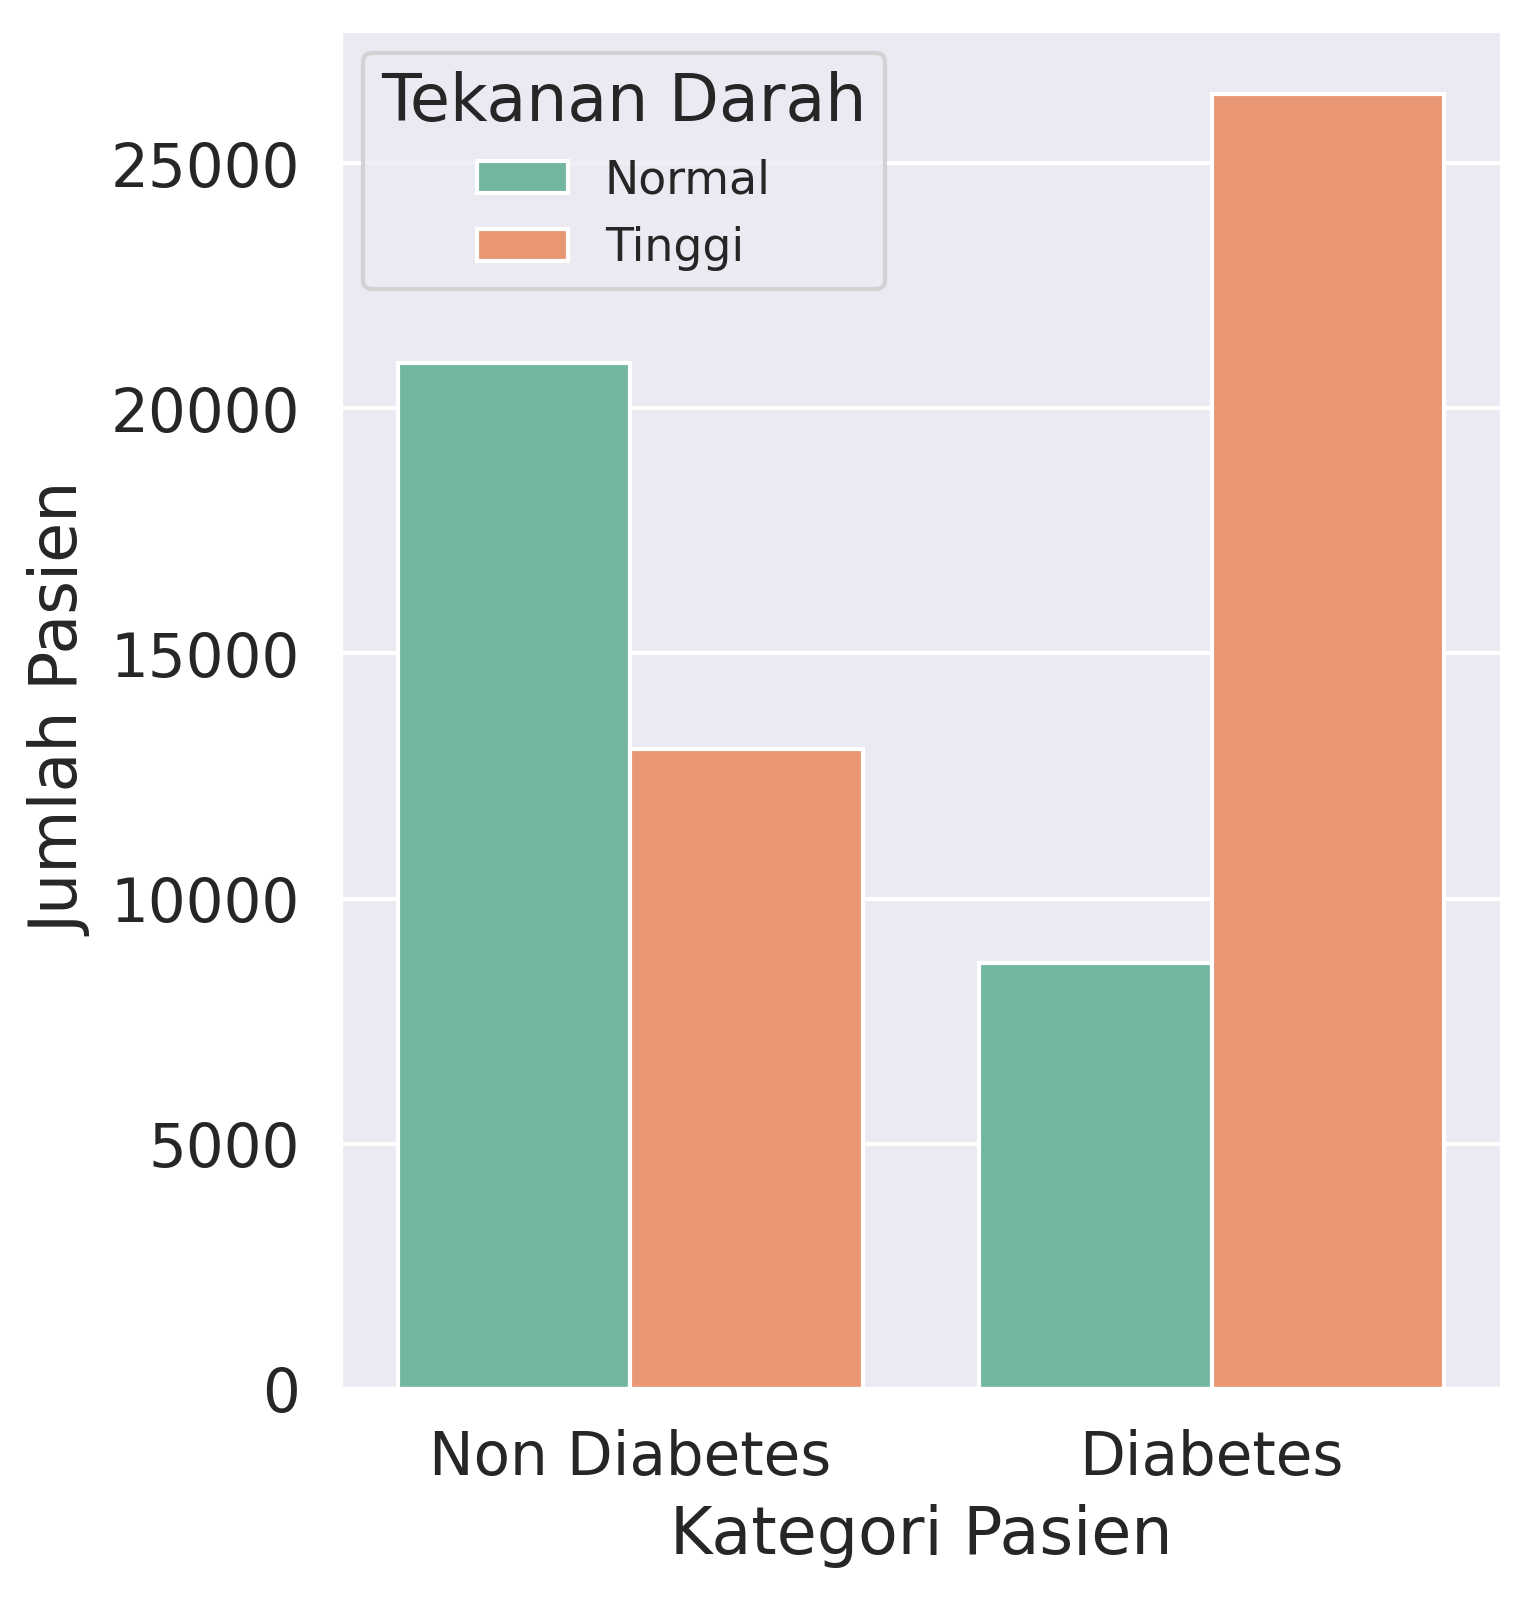

In [ ]:
#@title High BP
plt.figure(figsize=(5,6), dpi = 300)
test = sns.set_palette("Set2")
test = sns.countplot(x="Diabetes_binary", hue="HighBP", data=data)
test.set_ylabel("Jumlah Pasien")
test.set_xlabel("Kategori Pasien")
test.set_xticklabels(['Non Diabetes', 'Diabetes'])
plt.legend(labels=['Normal','Tinggi'], title = ('Tekanan Darah'), fontsize = 11)
plt.savefig("Tekanan Darah.png")

<Figure size 1500x1800 with 0 Axes>

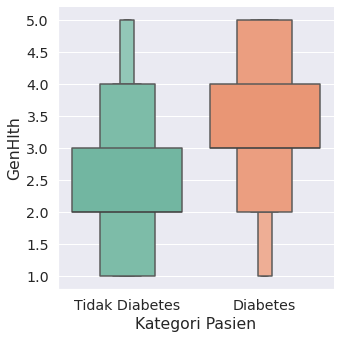

In [ ]:
plt.figure(figsize=(5,6), dpi = 300)
sns.set_palette("Set2")
box2 = sns.catplot(x="Diabetes_binary", y = "GenHlth", kind='boxen',data = data)
box2.set_xticklabels(['Tidak Diabetes', 'Diabetes'])
box2.set_xlabels("Kategori Pasien")
plt.savefig("Boxplot.png")

Kondisi kesehatan secara umum (GenHlth) :
Skala 1 - 5
* 1 : Sangat Sangat Baik
* 2 : Sangat Baik
* 3 : Baik
* 4 : Cukup
* 5 : Kurang

Indkes Massa Tubuh :
* Berat badan kurang : <18.5
* Berat badan normal : 18.5 - 24.9
* Berat badan berlebih : 25.0 - 29.9
* Obesitas kelas I : 30 - 34.9
* Obesitas kelas II : 35.0 - 39.9
* Obesitas kelas III : >40

# Model Machine Learning

data test split awal

In [ ]:
#@title Load X_train, X_test, Y_train, Y_test
from sklearn.neighbors import KNeighborsClassifier
# data_sample = data.sample(n=3500)
data_sample = data.copy()
X = data_sample.drop('Diabetes_binary', axis = 1).values
y = data_sample['Diabetes_binary'].values

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state = 42)

minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train)

X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

minmax scaler + feature importance

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data_sample[['BMI','GenHlth','Age','Income','HighBP']].values
y = data_sample['Diabetes_binary'].values

X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(
             X, y, test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train_scl)

X_train3 = scaler.transform(X_train_scl)
X_test3 = scaler.transform(X_test_scl)

## KNN

### Library

#### Predict

In [ ]:
K = []
training = []
test = []
scores = {}
scaler = MinMaxScaler()

for k in range(2, 21):
    scaler.fit(X_train)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8200146627565983, 0.639868861806001]
3 : [0.8274987781036168, 0.6752191575796451]
4 : [0.7894978005865103, 0.6722257857601026]
5 : [0.7918804985337243, 0.693749554557765]
6 : [0.7755070869990225, 0.6886893307675861]
7 : [0.7785312805474096, 0.7039412728957308]
8 : [0.7671981915933529, 0.6973130924381726]
9 : [0.7675953079178885, 0.7057943125935429]
10 : [0.76102761485826, 0.7048677927446368]
11 : [0.7640518084066471, 0.711424702444587]
12 : [0.7575757575757576, 0.7076473522913549]
13 : [0.7588892961876833, 0.7140617204760886]
14 : [0.7555596285434996, 0.7087876844130853]
15 : [0.7555290811339198, 0.715629677143468]
16 : [0.7526270772238515, 0.7137053666880478]
17 : [0.7536351417399805, 0.7181954244173615]
18 : [0.7510386119257088, 0.7155584063858599]
19 : [0.7504887585532747, 0.7199771933575654]
20 : [0.749175219941349, 0.7201197348727817]


#### Visualize

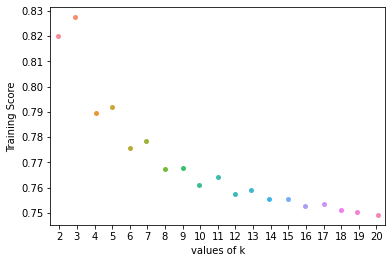

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()

### Scratch

In [ ]:
#KNN 1
class KNN:

  def __init__(self,k=3):
    self.k = k

  def fit(self,X,y) :
    #Metode fit
    self.X_train = X
    self.y_train = y


  def predict(self, X_test):
    y_pred = [self._get_single_prediction(x_test_row) for x_test_row in X_test]
    return py.array(y_pred)

  def _get_single_prediction(self, x_test_row):
    #Jarak baris uji dengan setiap baris latih
    distances = [self._get_euclidean_distance(x_test_row, x_train_row)
    for x_train_row in self.X_train]

    #Cari index dengan jumlah k yang jaraknya terdekat (terkecil)
    k_idx = py.argsort(distances)[:self.k]


    #Dari indeks tersebut, masukkan label y nya
    k_labels = [self.y_train[idx] for idx in k_idx]

    #Dari label tersebut, kembalikan label yang paling sering muncul
    return py.argmax(py.bincount(k_labels))

  def _get_euclidean_distance(self, x1, x2):
    #Jarak euclid
    sum_squared_distance = py.sum((x1 - x2)**2)
    return py.sqrt(sum_squared_distance)

#### Test 1 : Tanpa Feature Selection
*   Sampel = 3500
*   N Split = 5

Mean Accuracy : 0.6848571428571428


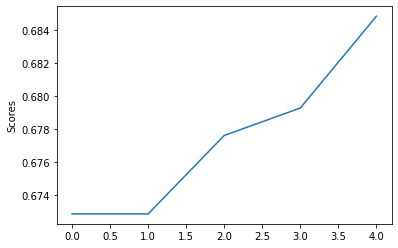

In [ ]:
#Test 1

#Rumus akurasi
def accuracy(y_true, y_pred) :
  accuracy = py.sum(y_true == y_pred) / len(y_true)
  return accuracy

#Penentuan X dan Y
data_sample = data.sample(n=3500)
X = data_sample.drop('Diabetes_binary', axis = 1).values
y = data_sample['Diabetes_binary'].values


#Cross validation
scores = []
scores_mean = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
#Acak datanya, kemudian bagi datanya menjadi n bagian (n-1 train dan 1 test), dengan urutan yang acak

for fold, (idx_train, idx_valid) in enumerate(cv.split(X)) :
  X_train, y_train = X[idx_train], y[idx_train]
  X_valid, y_valid = X[idx_valid], y[idx_valid]

  k = 5
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_valid)

  score = accuracy(y_valid, predictions)
  scores.append(score)
  scores_mean.append(py.mean(scores))

# print(f"Mean Accuracy : {py.mean(scores)}")
df_knn_scores = pd.DataFrame (scores_mean, columns = ['Scores'])
sns.lineplot(data = df_knn_scores, x = df_knn_scores.index, y = 'Scores', markers=True, dashes=False)

print(f"Mean Accuracy : {py.mean(scores)}")

#### Test 2 : Feature selection, 5 fitur teratas

Mean Accuracy : 0.6797142857142858


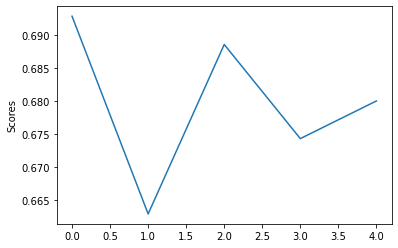

In [ ]:
#Test KNN 2

#Rumus akurasi
def accuracy(y_true, y_pred) :
  accuracy = py.sum(y_true == y_pred) / len(y_true)
  return accuracy

#Penentuan X dan Y
data_sample = data.sample(n=3500)
X = data_sample[['BMI','GenHlth','Age','Income','HighBP']].values
y = data_sample['Diabetes_binary'].values

#Cross validation
scores = []
scores_mean = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
#Acak datanya, kemudian bagi datanya menjadi n bagian (n-1 train dan 1 test), dengan urutan yang acak

for fold, (idx_train, idx_valid) in enumerate(cv.split(X)) :
  X_train, y_train = X[idx_train], y[idx_train]
  X_valid, y_valid = X[idx_valid], y[idx_valid]

  k = 5
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_valid)

  score = accuracy(y_valid, predictions)
  scores.append(score)

df_knn_scores = pd.DataFrame (scores, columns = ['Scores'])
sns.lineplot(data = df_knn_scores, x = df_knn_scores.index, y = 'Scores', markers=True, dashes=False)

print(f"Mean Accuracy : {py.mean(scores)}")

#### Test 3 : Feature selection dengan 5 fitur teratas + MinMax Scaler

Mean Accuracy : 0.7048571428571428


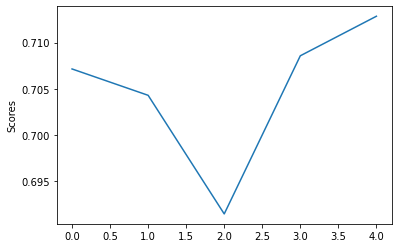

In [ ]:
#Rumus akurasi
def accuracy(y_true, y_pred) :
  accuracy = py.sum(y_true == y_pred) / len(y_true)
  return accuracy


#Penentuan X dan Y
data_sample = data.sample(n=3500)
X = data_sample[['BMI','GenHlth','Age','Income','HighBP']].values
y = data_sample['Diabetes_binary'].values

#Cross validation
scaler = MinMaxScaler()
scores = []
scores_mean = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
#Acak datanya, kemudian bagi datanya menjadi n bagian (n-1 train dan 1 test), dengan urutan yang acak, dan ujicoba tiap datanya terhadap n-1 data lainnya

for fold, (idx_train, idx_valid) in enumerate(cv.split(X)) :
  X_train, y_train = X[idx_train], y[idx_train]
  X_valid, y_valid = X[idx_valid], y[idx_valid]

  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_valid= scaler.transform(X_valid)

  k = 5
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_valid)

  score = accuracy(y_valid, predictions)
  scores.append(score)

df_knn_scores = pd.DataFrame (scores, columns = ['Scores'])
sns.lineplot(data = df_knn_scores, x = df_knn_scores.index, y = 'Scores', markers=True, dashes=False)

print(f"Mean Accuracy : {py.mean(scores)}")

#### Test 4 : Min Max Scaler Tanpa Feature Selection

Mean Accuracy : 0.6882857142857143


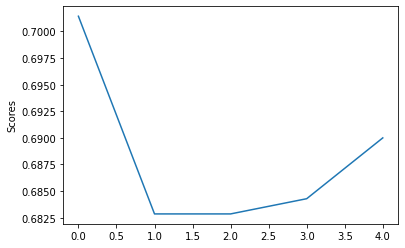

In [ ]:
#Rumus akurasi
def accuracy(y_true, y_pred) :
  accuracy = py.sum(y_true == y_pred) / len(y_true)
  return accuracy


#Penentuan X dan Y
data_sample = data.sample(n=3500)
X = data_sample.drop('Diabetes_binary', axis = 1).values
y = data_sample['Diabetes_binary'].values

#Cross validation
scaler = MinMaxScaler()
scores = []
scores_mean = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
#Acak datanya, kemudian bagi datanya menjadi n bagian (n-1 train dan 1 test), dengan urutan yang acak

for fold, (idx_train, idx_valid) in enumerate(cv.split(X)) :
  X_train, y_train = X[idx_train], y[idx_train]
  X_valid, y_valid = X[idx_valid], y[idx_valid]

  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_valid= scaler.transform(X_valid)

  k = 5
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_valid)

  score = accuracy(y_valid, predictions)
  scores.append(score)

df_knn_scores = pd.DataFrame (scores, columns = ['Scores'])
sns.lineplot(data = df_knn_scores, x = df_knn_scores.index, y = 'Scores', markers=True, dashes=False)

print(f"Mean Accuracy : {py.mean(scores)}")

## Catatan Hasil KNN

=== Data Tanpa Penghapusan Outlier ===

------------------------ Library -----------------------------

Ujicoba K (2 - 15)

Mean akurasi train : 77.96%

Mean akurasi test : 70.47%

------------------------ Scratch -----------------------------

Ujicoba K (3)

Mean akurasi :

Test 1 : 65.71%

Test 2 : 66.54%

Test 3 : 68.11%

Test 4 : 67.48%

Ujicoba K (5)

Mean akurasi :

Test 1 : 68.48%

Test 2 : 67.97%

Test 3 : 70.48%

Test 4 : 68.82%

Metode scratch terbaik dari 4 test : Test 3, K = 5


=== Data Dengan Penghapusan Outlier ===

Mean akurasi train : 77.63%

mean akurasi test : 69.56%

## Decision Tree Classifier

tanpa feature importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train2, y_train)
y_pred = tree_model.predict(X_test2)

print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.671     0.677     0.674      5133
         1.0      0.603     0.596     0.599      4221

    accuracy                          0.640      9354
   macro avg      0.637     0.636     0.637      9354
weighted avg      0.640     0.640     0.640      9354



find best parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dtc,
                   param_grid=params,
                   n_jobs=-1,
                   verbose=1)
clf.fit(X_train2, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'criterion': 'gini', 'max_depth': 6}


dengan parameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(criterion='gini',max_depth=6)
tree_model = tree_model.fit(X_train2, y_train)
y_pred = tree_model.predict(X_test2)

print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.747     0.758     0.752      5133
         1.0      0.700     0.687     0.694      4221

    accuracy                          0.726      9354
   macro avg      0.723     0.723     0.723      9354
weighted avg      0.726     0.726     0.726      9354



dengan 5 fitur teratas

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',max_depth=6)
tree_model = tree_model.fit(X_train3, y_train_scl)
y_pred = tree_model.predict(X_test3)

print(classification_report(y_test_scl, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.746     0.755     0.750      5133
         1.0      0.698     0.687     0.692      4221

    accuracy                          0.724      9354
   macro avg      0.722     0.721     0.721      9354
weighted avg      0.724     0.724     0.724      9354



## XGB Classifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train2, y_train)
y_pred = model.predict(X_test2)

print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.773     0.745     0.758      5133
         1.0      0.703     0.733     0.718      4221

    accuracy                          0.740      9354
   macro avg      0.738     0.739     0.738      9354
weighted avg      0.741     0.740     0.740      9354



find best parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'n_estimators': [100, 500]}

xgbc = XGBClassifier()
clf = GridSearchCV(estimator=xgbc,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   n_jobs=-1,
                   verbose=1)
clf.fit(X_train2, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 3, 'n_estimators': 500}


with parameter

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=3,n_estimators=500)
model.fit(X_train2, y_train)
y_pred = model.predict(X_test2)

print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.775     0.743     0.759      5133
         1.0      0.703     0.738     0.720      4221

    accuracy                          0.741      9354
   macro avg      0.739     0.740     0.739      9354
weighted avg      0.742     0.741     0.741      9354



Xgboost dengan 5 fitur teratas

In [ ]:
import pandas as pd
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=3,n_estimators=500)
model.fit(X_train3, y_train_scl)

y_pred = model.predict(X_test3)

print(classification_report(y_test_scl, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

         0.0      0.762     0.736     0.748      5133
         1.0      0.691     0.720     0.706      4221

    accuracy                          0.729      9354
   macro avg      0.727     0.728     0.727      9354
weighted avg      0.730     0.729     0.729      9354



## SVM classifier

SVM dengan minmax scaler

In [ ]:

from sklearn.svm import SVC


# standarisasi nilai-nilai dari dataset

clf = SVC()
clf.fit(X_train2, y_train)
y_pred = clf.predict(X_test2)

print(classification_report(y_test, y_pred, digits=3, zero_division = 1))


              precision    recall  f1-score   support

         0.0      0.769     0.748     0.758      5133
         1.0      0.703     0.727     0.715      4221

    accuracy                          0.738      9354
   macro avg      0.736     0.737     0.737      9354
weighted avg      0.739     0.738     0.739      9354



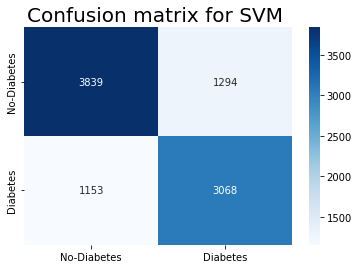

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for SVM ', fontsize = 20);

SVM classifier dengan 5 fitur teratas + minmax scaler

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC


clf = SVC()
clf.fit(X_train3, y_train_scl)

y_pred = clf.predict(X_test3)

print(classification_report(y_test_scl, y_pred, digits=3, zero_division = 1))


              precision    recall  f1-score   support

         0.0      0.764     0.730     0.747      5133
         1.0      0.689     0.726     0.707      4221

    accuracy                          0.728      9354
   macro avg      0.726     0.728     0.727      9354
weighted avg      0.730     0.728     0.729      9354

